## Modelling

Model a Logistic regression

In [57]:
# import libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sn

## Assess data

In [58]:
df = pd.read_csv('data/preprocessed_df.csv')

In [59]:
# Define independent (X) and dependent variables (y)
X = df.drop(['classificatie', 'aankomststationVerkorting', 'vertrekstationVerkorting', 'slice dt iso', 'vertrekmoment_utc', 'verkeersdatum_ams'], axis=1)
y = df['classificatie']

## Build model

In [61]:
# Random undersampling
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

In [62]:
# Make train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [63]:
# Make pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

In [64]:
# fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [65]:
# Predict on test
y_pred = pipeline.predict(X_test)

## Metrics

Accuracy of the model: 0.5692307692307692


<Axes: >

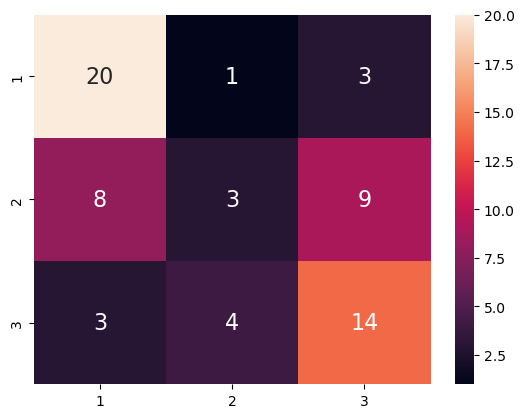

In [67]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

# calculate confusion matrix
true_labels = [1, 2, 3]
confusion_matrix_array = confusion_matrix(y_test, y_pred)
confusion_matrix_dataframe = pd.DataFrame(confusion_matrix_array, range(3), range(3))
sn.heatmap(confusion_matrix_dataframe, annot=True, annot_kws={"size": 16}, xticklabels=true_labels, yticklabels=true_labels)

### Coefficients and intercepts

In [13]:
lr_model = pipeline.named_steps['lr']

In [14]:
lr_model.coef_

array([[ 1.07831223,  0.10141393, -0.11965107, -0.04770181,  0.39599479],
       [-0.25425757, -0.04346693,  0.1454941 ,  0.17896445, -0.11492152],
       [-0.82405466, -0.05794699, -0.02584303, -0.13126264, -0.28107327]])

In [15]:
lr_model.intercept_

array([-0.21689744,  0.20242989,  0.01446755])